In [1]:
import random
from typing import Callable, Dict, List, Tuple, TypeVar, DefaultDict
from util import *
import math

FeatureVector = Dict[str, int]
WeightVector = Dict[str, float]
Example = Tuple[FeatureVector, int]

# Linear Regression via gradient descent in vanilla python (no external libraries)

### From this video https://www.youtube.com/watch?v=nEWNNt2KmfQ


### Define Some Utils

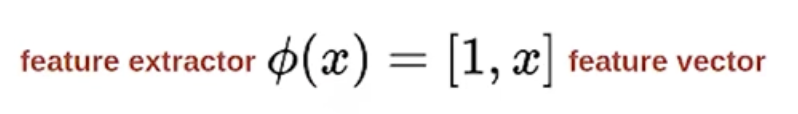

In [2]:
# creates a feature vector for this exmaple
def phi(x):
    return [1, x]

In [3]:
# dots two vectors
def dot(x, y):
    sum = 0
    for i in range(len(x)):
        sum += x[i] * y[i]
    return sum

# multiply a vector by a scalar
def vector_scalar_multiply(vector, scalar):
    return [num * scalar for num in vector]

# multiply vector by another vector
def vector_vector_multiply(vector_a, vector_b):
    return [vector_a[i] * vector_b[i] for i in range(len(vector_a))]


### Test Utils

In [4]:
print('should be [1,4]')
print(phi(4))

should be [1,4]
[1, 4]


In [5]:
print("should be 3")
print(dot([1,2], [1,1]))

should be 3
3


### Define predict

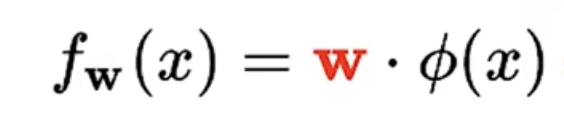

In [6]:
def predict(x, w):
    return dot(w, phi(x))

### Define Loss

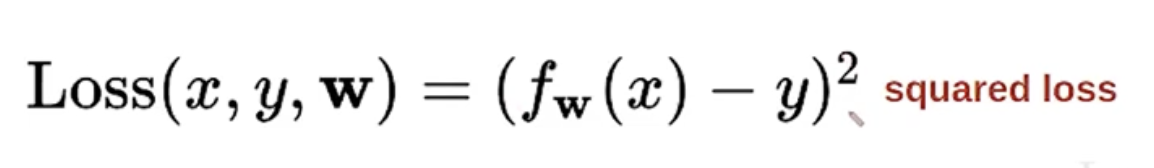

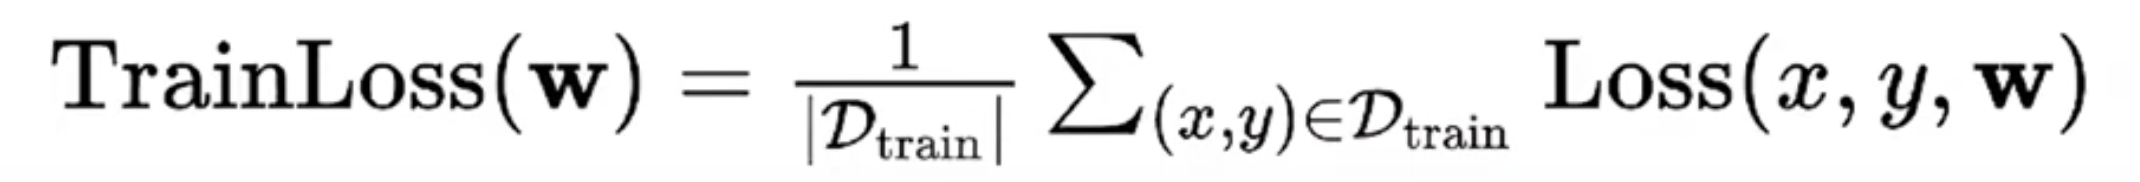

In [7]:
# individual loss
def loss(w, x, y):
    return pow(predict(x, w) - y, 2)

#train loss
def train_loss(w, train_data):
    return round(sum([loss(w, t[0], t[1]) for t in train_data])/len(train_data), 3)

### Gradient Descent

In [8]:
#Define initial performance
weights = [.6, .2]
d_train = [[2,3], [4,6], [5,8]]
initial_loss = train_loss(weights, d_train)
print("loss ", initial_loss)

loss  22.04


We want to know how to change weights such that the output of train_loss is lower.

Enter calculus! 
Calculus can tell us how the output of a function will change as our input changes. So this can give us the "slope" or "direction" we need follow.

If calculus tells us that increasing an input will increase the output, then we will do the OPPOSITE since we want our loss function to be as low as possible. 

So to do this, we need to calculate the derivative with respect to our weights, and then evaluate it with our training data.

----

This is the math expression for a loss function

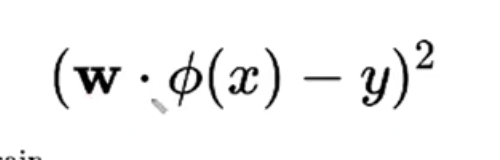

To take the derivative of this, we will use the product rule and the chain rule.

If that is unfamiliar, calc is beyond the scope of this, but you can probably watch some videos and talk to chat GPT.

The derivative of the above function is 

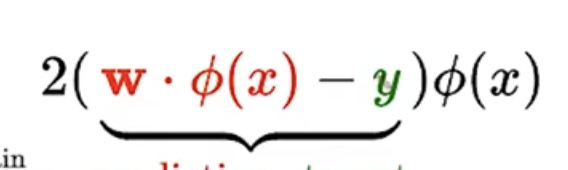



So NOW, with that derivative defined, we can evaluate for our training data... 

So let's try with a tiny example

In [9]:
# Actually evaluate the derivative we defined above

def derivative_with_respect_to_w(w, x, y):

    #first we will evaluate the 2(w • phi(x) - y) part 
    scalar = 2 * (dot(w, phi(x)) - y)

    # then multiply that by phi(x)
    return vector_scalar_multiply(scalar=scalar, vector=phi(x))

#get the gradient for the first train example
gradient = derivative_with_respect_to_w(weights, d_train[0][0], d_train[0][1])
print(gradient)

[-4.0, -8.0]


Ok but what is this actually telling us?

It's telling us that the direction we need to adjust each of our weights to increase the output.

If we want our output to go UP, we would LOWER our weights. The first weight by some amount, the second weight by double that amount.

(Note that the important thing here is the relative direction, not the exact value)

However, the output of our function is how bad our prediction is, so we do the opposite, so we're going to subtract these numbers

So we need to actually INCREASE w1, and INCREASE w2 by even more.

So let's do a small adjustment of the weights based on this. The size of adjustment will be step size

In [10]:
step_size = .01

print("old weights ", weights)
weights = [round(weights[i] - gradient[i] * step_size, 3) for i in range(len(gradient))]
print("new weights ", weights)


old weights  [0.6, 0.2]
new weights  [0.64, 0.28]


Ok like we wanted, those weights are now a bit higher, which should reduce output of loss function 

Now lets use those new weights on the same x,y and compare our losses

In [11]:
print("old-loss", initial_loss)
print("new loss ", train_loss(weights, d_train))


old-loss 22.04
new loss  18.913


It went down! Now let's do it again!

We'll re-calc the gradient, and do gradient descent. 

In [12]:
print("prev gradient ", gradient)
gradient = derivative_with_respect_to_w(weights, d_train[0][0], d_train[0][1])
print("new gradient ",gradient)

print("prev loss ", train_loss(weights, d_train))
weights = [weights[i] - gradient[i] * step_size for i in range(len(gradient))]
print("new loss ", train_loss(weights, d_train))

prev gradient  [-4.0, -8.0]
new gradient  [-3.5999999999999996, -7.199999999999999]
prev loss  18.913
new loss  16.306


It went down again, let's do it again!!!

In [13]:
print("prev gradient ", gradient)
gradient = derivative_with_respect_to_w(weights, d_train[0][0], d_train[0][1])
print("new gradient ",gradient)

print("prev loss ", train_loss(weights, d_train))
weights = [weights[i] - gradient[i] * step_size for i in range(len(gradient))]
print("new loss ", train_loss(weights, d_train))

prev gradient  [-3.5999999999999996, -7.199999999999999]
new gradient  [-3.2399999999999998, -6.4799999999999995]
prev loss  16.306
new loss  14.127


Let's  run through this training cycle 10 times. 

In [14]:
for i in range(20):
    print("prev gradient ", gradient)
    gradient = derivative_with_respect_to_w(weights, d_train[0][0], d_train[0][1])
    print("new gradient ",gradient)

    print("prev loss ", train_loss(weights, d_train))
    weights = [weights[i] - gradient[i] * step_size for i in range(len(gradient))]
    print("new loss ", train_loss(weights, d_train))

prev gradient  [-3.2399999999999998, -6.4799999999999995]
new gradient  [-2.9159999999999995, -5.831999999999999]
prev loss  14.127
new loss  12.302
prev gradient  [-2.9159999999999995, -5.831999999999999]
new gradient  [-2.6243999999999996, -5.248799999999999]
prev loss  12.302
new loss  10.769
prev gradient  [-2.6243999999999996, -5.248799999999999]
new gradient  [-2.36196, -4.72392]
prev loss  10.769
new loss  9.479
prev gradient  [-2.36196, -4.72392]
new gradient  [-2.1257639999999993, -4.251527999999999]
prev loss  9.479
new loss  8.39
prev gradient  [-2.1257639999999993, -4.251527999999999]
new gradient  [-1.9131875999999997, -3.8263751999999993]
prev loss  8.39
new loss  7.469
prev gradient  [-1.9131875999999997, -3.8263751999999993]
new gradient  [-1.721868839999999, -3.443737679999998]
prev loss  7.469
new loss  6.686
prev gradient  [-1.721868839999999, -3.443737679999998]
new gradient  [-1.5496819559999997, -3.0993639119999994]
prev loss  6.686
new loss  6.021
prev gradient  

Awesome we are getting lower!! 

Let's run 100 and print final result. 

In [15]:
for i in range(100):
    gradient = derivative_with_respect_to_w(weights, d_train[0][0], d_train[0][1])
    weights = [weights[i] - gradient[i] * step_size for i in range(len(gradient))]
    
print("new loss ", train_loss(weights, d_train))

new loss  1.667


Hmm not getting to 0, let's try with 10000

In [18]:
for i in range(1000):
    gradient = derivative_with_respect_to_w(weights, d_train[0][0], d_train[0][1])
    weights = [weights[i] - gradient[i] * step_size for i in range(len(gradient))]
    
print("new loss ", train_loss(weights, d_train))

new loss  1.667


It stalled.. why??  Well it's not because of too few cycles... Try upping the cycles and see that it makes no diff. 

Well look how we are calculating our gradient. We are calculating it only in respect to the FIRST train example.

So in theory our predictor should be great for first training example, but not so great for the next. Let's test it. 


In [104]:
print('result for first train example ', predict(d_train[0][0],weights))
print('expected ', d_train[0][1])

print('result for first train example ', predict(d_train[1][0],weights))
print('expected ', d_train[1][1])

result for first train example  2.9999999999999987
expected  3
result for first train example  4.999999999999998
expected  6


Aha! So we are basically there for first train example, but off for second train example, since after all we are only optimizing for first train.

So we want to take the gradient for ALL the train examples. 

We WERE doing this

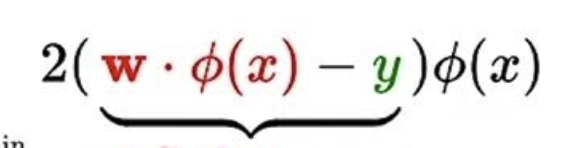

But now we want to do this

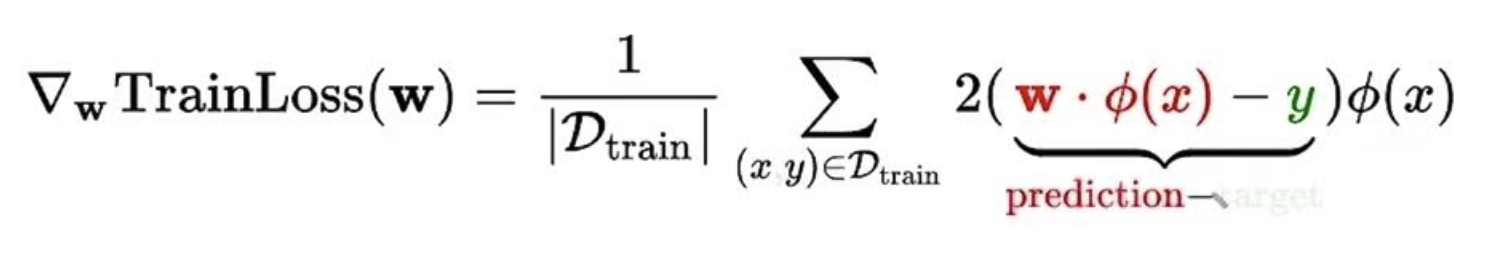

Calc all the gradients, and average them!

This is the REAL secret of gradient descent. What we were doing was like a baby version

Let's do it ...

In [126]:
# We need this util
def vector_summation(vectors):
    summed_vector = [0 for _ in vectors[0]]
    for v in vectors:
        for i in range(len(v)):
            summed_vector[i] += v[i]

    return summed_vector


def vector_scalar_division(vector, scalar):
    return [v / scalar for v in vector]

In [129]:
def gradient_descent(weights, train_data):
    individual_gradients = []
    for train_example in train_data:
        individual_gradients.append(derivative_with_respect_to_w(weights, train_example[0], train_example[1]))
    return vector_scalar_division(vector_summation(individual_gradients), len(train_data))
    # return round(vector_summation(individual_gradients) / len(train_data), 3)


Ok now let's reset our weights, and train based on this new gradient descent and evaluate 

In [136]:
weights = [.6, .2]

for i in range(1000):
    gradient = gradient_descent(weights, d_train)
    weights = [weights[i] - gradient[i] * step_size for i in range(len(gradient))]
    
print("new loss ", train_loss(weights, d_train))

new loss  0.027


Woah!! IT went down a lot more!

Now let's run that same sanity check we did earlier ...

In [137]:
print('result for first train example ', predict(d_train[0][0],weights))
print('expected ', d_train[0][1])

print('result for second train example ', predict(d_train[1][0],weights))
print('expected ', d_train[1][1])

print('result for third train example ', predict(d_train[2][0],weights))
print('expected ', d_train[2][1])

result for first train example  3.0172359950537118
expected  3
result for second train example  6.217044610733779
expected  6
result for third train example  7.816948918573812
expected  8


Wahoo we are extremely close on all of them!

And that's all folks